In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data (or re-run the cleaning code from notebook 1)
df = pd.read_csv("Basketball Data 2024-2025 Season - Sheet1.csv")

multi_team_codes = ["2TM", "3TM", "4TM"]
multi_team_rows = df[df["Team"].isin(multi_team_codes)]
multi_team_players = set(multi_team_rows["Player"])
single_team_rows = df[~df["Player"].isin(multi_team_players)]
df_clean = pd.concat([single_team_rows, multi_team_rows], ignore_index=True)

df_clean = df_clean[df_clean["G"] > 0].copy()
df_clean["PTS_per_game"] = df_clean["PTS"] / df_clean["G"]
df_clean["threePA_per_game"] = df_clean["3PA"] / df_clean["G"]
df_clean["FTA_per_game"] = df_clean["FTA"] / df_clean["G"]
df_clean["MP_per_game"] = df_clean["MP"] / df_clean["G"]


## Filtering out role players to display the all-stars(best players) 

In [2]:
# Keep players with at least 20 minutes per game and 40+ games
df_rot = df_clean[(df_clean["MP_per_game"] >= 20) & (df_clean["G"] >= 40)].copy()

df_rot[["Player", "Team", "Pos", "PTS_per_game", "threePA_per_game", "FTA_per_game"]].head()

,Player,Team,Pos,PTS_per_game,threePA_per_game,FTA_per_game
0,Shai Gilgeous-Alexander,OKC,PG,32.684211,5.723684,8.802632
1,Anthony Edwards,MIN,SG,27.556962,10.265823,6.278481
2,Nikola Jokić,DEN,C,29.585714,4.728571,6.442857
3,Giannis Antetokounmpo,MIL,PF,30.388060,0.940299,10.552239
4,Jayson Tatum,BOS,PF,26.833333,10.111111,6.111111


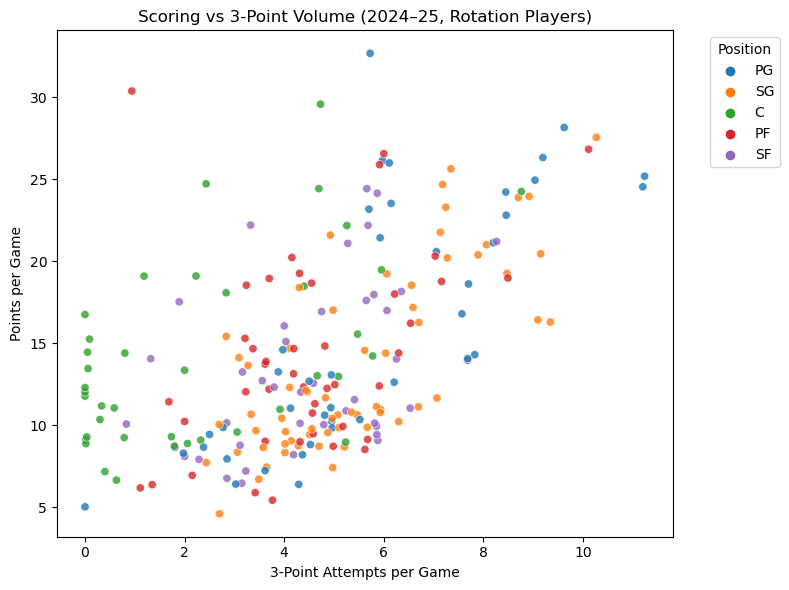

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_rot,
    x="threePA_per_game",
    y="PTS_per_game",
    hue="Pos",
    alpha=0.8
)
plt.title("Scoring vs 3-Point Volume (2024–25, Rotation Players)")
plt.xlabel("3-Point Attempts per Game")
plt.ylabel("Points per Game")
plt.legend(title="Position", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


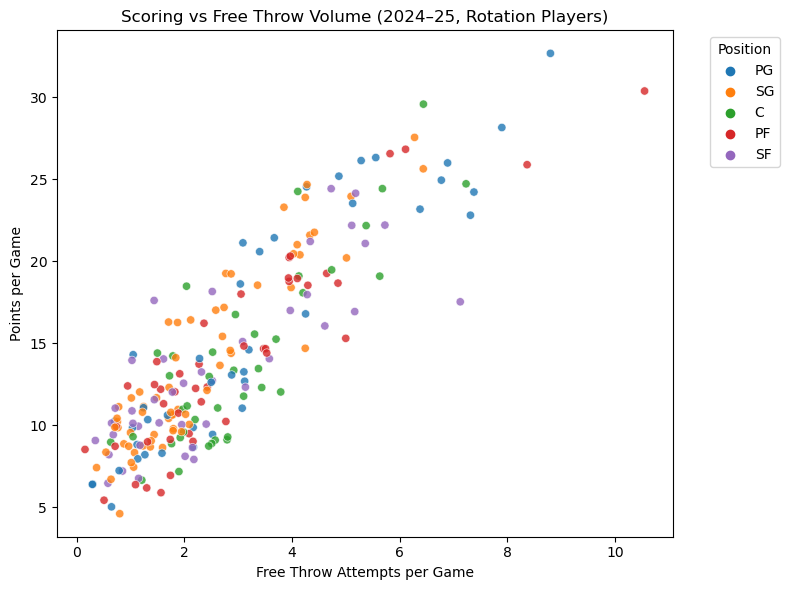

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_rot,
    x="FTA_per_game",
    y="PTS_per_game",
    hue="Pos",
    alpha=0.8
)
plt.title("Scoring vs Free Throw Volume (2024–25, Rotation Players)")
plt.xlabel("Free Throw Attempts per Game")
plt.ylabel("Points per Game")
plt.legend(title="Position", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


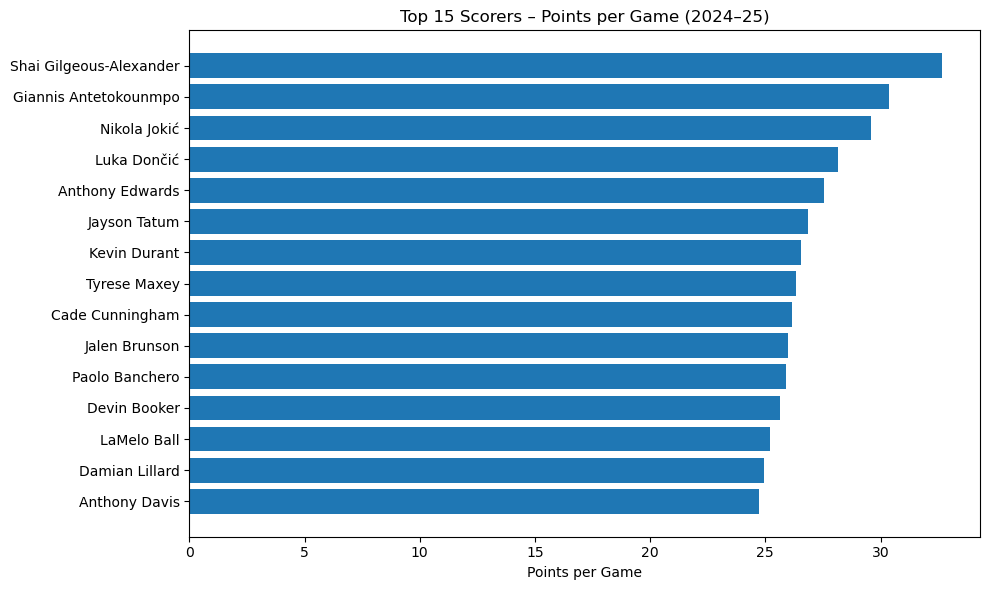

In [5]:
top15 = df_rot.sort_values("PTS_per_game", ascending=False).head(15)

plt.figure(figsize=(10, 6))
# Sort so highest scorer at top
top15 = top15.sort_values("PTS_per_game")

plt.barh(top15["Player"], top15["PTS_per_game"])
plt.title("Top 15 Scorers – Points per Game (2024–25)")
plt.xlabel("Points per Game")
plt.tight_layout()
plt.show()


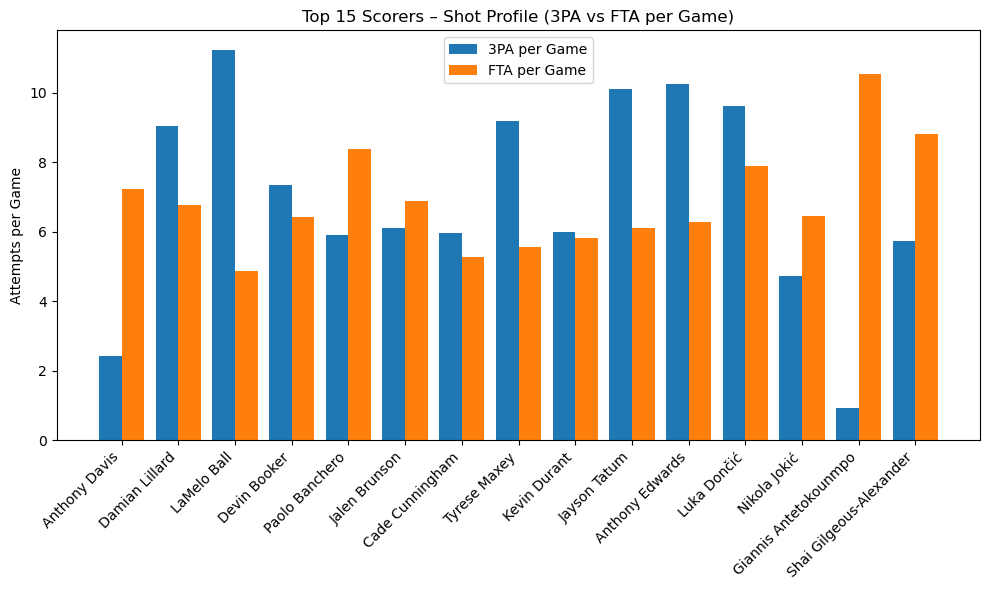

In [6]:
plt.figure(figsize=(10, 6))
width = 0.4
x = range(len(top15))

plt.bar(
    [i - width/2 for i in x],
    top15["threePA_per_game"],
    width=width,
    label="3PA per Game"
)
plt.bar(
    [i + width/2 for i in x],
    top15["FTA_per_game"],
    width=width,
    label="FTA per Game"
)

plt.xticks(list(x), top15["Player"], rotation=45, ha="right")
plt.title("Top 15 Scorers – Shot Profile (3PA vs FTA per Game)")
plt.ylabel("Attempts per Game")
plt.legend()
plt.tight_layout()
plt.show()


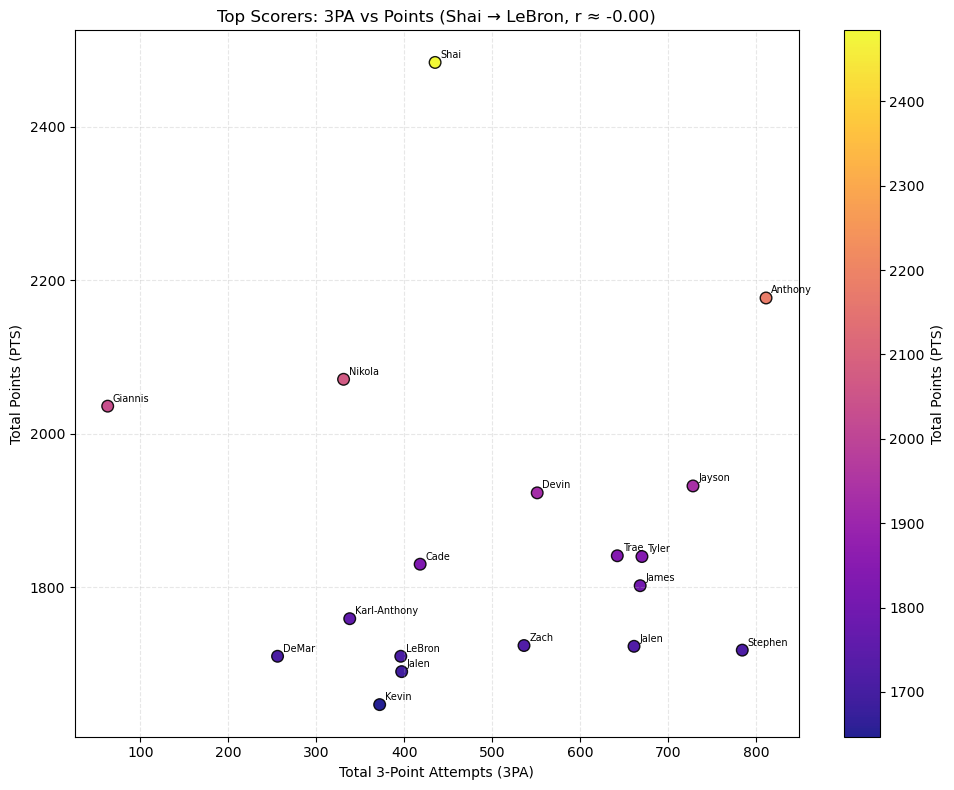

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_name = "Basketball Data 2024-2025 Season - Sheet1 (1).csv"
df = pd.read_csv(file_name)

# Get rows from Shai to LeBron
start_idx = df.index[df["Player"] == "Shai Gilgeous-Alexander"][0]
end_idx   = df.index[df["Player"] == "LeBron James"][0]

sub = df.loc[start_idx:end_idx, ["Player", "3PA", "PTS"]].copy().reset_index(drop=True)

players = sub["Player"].values
threepa = sub["3PA"].values
pts     = sub["PTS"].values

corr = np.corrcoef(threepa, pts)[0, 1]

# Smaller + more colorful figure
plt.figure(figsize=(10, 8))   # <- smaller height

# Color points by points scored
sc = plt.scatter(
    threepa, pts,
    c=pts,                      # color based on PTS
    cmap="plasma",              # colorful colormap
    s=70,                       # point size
    edgecolors="black",
    alpha=0.9
)

# Label each dot
for x, y, name in zip(threepa, pts, players):
    first_name = name.split()[0]
    plt.text(x + 6, y + 6, first_name, fontsize=7)

plt.xlabel("Total 3-Point Attempts (3PA)")
plt.ylabel("Total Points (PTS)")
plt.title(f"Top Scorers: 3PA vs Points (Shai → LeBron, r ≈ {corr:.2f})")

plt.grid(True, linestyle="--", alpha=0.3)

# Add a colorbar so colors have meaning
cbar = plt.colorbar(sc)
cbar.set_label("Total Points (PTS)")

plt.tight_layout()
plt.show()


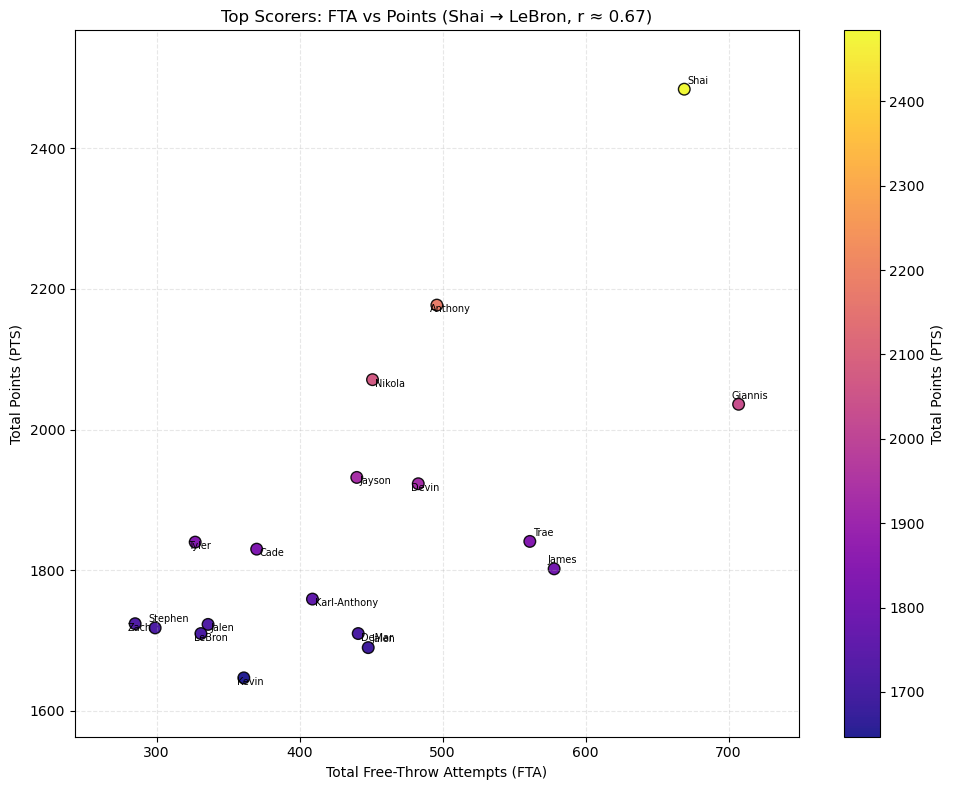

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV
file_name = "Basketball Data 2024-2025 Season - Sheet1 (1).csv"
df = pd.read_csv(file_name)

# Get rows from Shai to LeBron (same logic as before)
start_idx = df.index[df["Player"] == "Shai Gilgeous-Alexander"][0]
end_idx   = df.index[df["Player"] == "LeBron James"][0]

sub = df.loc[start_idx:end_idx, ["Player", "FTA", "PTS"]].copy().reset_index(drop=True)

players = sub["Player"].values
fta     = sub["FTA"].values
pts     = sub["PTS"].values

# Correlation between FTA and PTS
corr = np.corrcoef(fta, pts)[0, 1]

# Wider, shorter figure to reduce clumping
fig, ax = plt.subplots(figsize=(10, 8))

# Color points by total points (same as 3PA plot)
sc = ax.scatter(
    fta, pts,
    c=pts,
    cmap="plasma",
    s=70,
    edgecolors="black",
    alpha=0.9
)

# Add padding around the data so it's not squished
x_margin = (fta.max() - fta.min()) * 0.1
y_margin = (pts.max() - pts.min()) * 0.1

ax.set_xlim(fta.min() - x_margin, fta.max() + x_margin)
ax.set_ylim(pts.min() - y_margin, pts.max() + y_margin)

# Label each point with the player's first name (with small offsets)
for i, (x, y, name) in enumerate(zip(fta, pts, players)):
    first_name = name.split()[0]
    dx = 2 if i % 2 == 0 else -5   # small horizontal jiggle
    dy = 8 if i % 3 == 0 else -10  # small vertical jiggle
    ax.text(x + dx, y + dy, first_name, fontsize=7)

ax.set_xlabel("Total Free-Throw Attempts (FTA)")
ax.set_ylabel("Total Points (PTS)")
ax.set_title(f"Top Scorers: FTA vs Points (Shai → LeBron, r ≈ {corr:.2f})")

ax.grid(True, linestyle="--", alpha=0.3)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Total Points (PTS)")

plt.tight_layout()
plt.show()
